**Apple Quality Analysis**

This project is made to predict the quality of an apple based on 3 factors that I found contributing. \
Original dataset: `https://www.kaggle.com/datasets/nelgiriyewithana/apple-quality`

The following is the original dataset. It seems to be adjusted based on average value, which new input data might require a little adjustment, but does not affect the data processing over here. I have casted the data to float64 for easier data processing. The original data contained the author's name at the bottom of the CSV and I removed it in terminal instead of here. I also added a boolean column called `Good` since it is faster to check a boolean than checking whether the string equals "good"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("apple_quality.csv", header = 0, dtype = \
                 {'A-id': int, 'Size': np.float64, \
                  'Weight': np.float64, 'Sweetness': np.float64, \
                  'Crunchiness': np.float64, 'Juiciness': np.float64, \
                  'Ripeness': np.float64, 'Acidity': np.float64, \
                  'Quality': str})
df['Good'] = df['Quality'] == 'good'
print(df.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0     0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1     1 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2     2 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3     3 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4     4  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

    Acidity Quality   Good  
0 -0.491590    good   True  
1 -0.722809    good   True  
2  2.621636     bad  False  
3  0.790723    good   True  
4  0.501984    good   True  


I plan to include three categories inside my data analysis, starting with trying out two categories and check whether a slight pattern is being revealed. I eventually choose `Size` and `Sweetness` for my first two categoties. (red for bad, green for good)

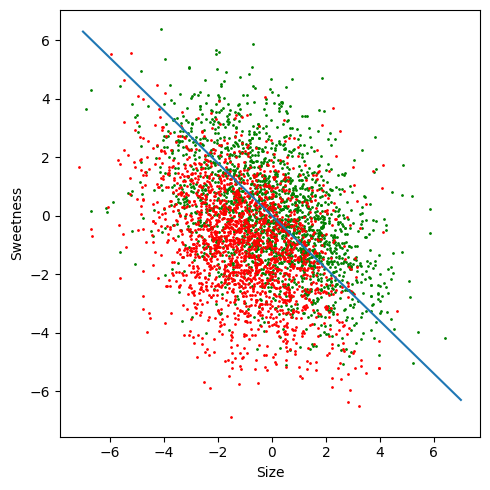

In [ ]:
def f(x):
    return -0.9 * x
x = np.linspace(-7, 7, 1000)
y = f(x)

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

good_size = df[df['Good']]['Size']
good_sweetness = df[df['Good']]['Sweetness']
bad_size = df[df['Good'] == False]['Size']
bad_sweetness = df[df['Good'] == False]['Sweetness']
plt.scatter(good_size, good_sweetness, c='green', s=1)
plt.scatter(bad_size, bad_sweetness, c='red', s=1)
plt.xlabel('Size')
plt.ylabel('Sweetness')
plt.plot(x, y)
plt.show()

While the data seems mixed, it does have a slight pattern that I could separate them with a negatively sloped line, and it has the potential to be split more accurately when a third axis is being added. I choose `Crunchiness` and it has a satisfying result.

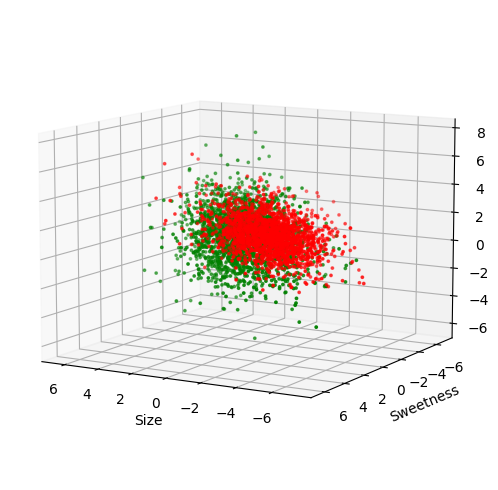

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

good_crunchiness = df[df['Good']]['Crunchiness']
bad_crunchiness = df[df['Good'] == False]['Crunchiness']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_size, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

ax.view_init(10, 120)

plt.show()

I need to rotate it a little to show that the red part is clustered and there are more green dots on the other side:

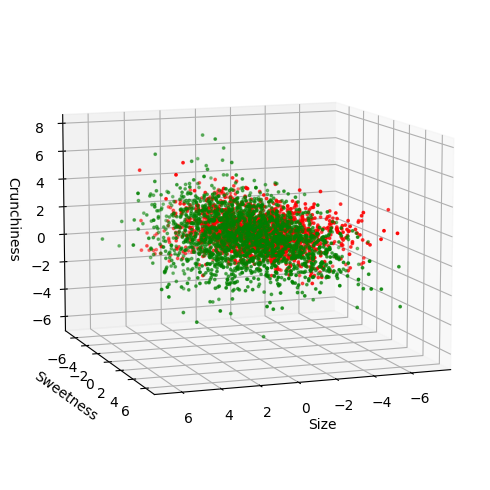

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

good_crunchiness = df[df['Good']]['Crunchiness']
bad_crunchiness = df[df['Good'] == False]['Crunchiness']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_size, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

ax.view_init(10, 70)

plt.show()

The rotated graph above shows that bad apples seems to cluster on one side, while the other side contains mostly good apples. As a result, a flat plane would be a good choice for data splits. But before I calculate the plane I need to "zoom-in" to check how the middle part actually looks like.

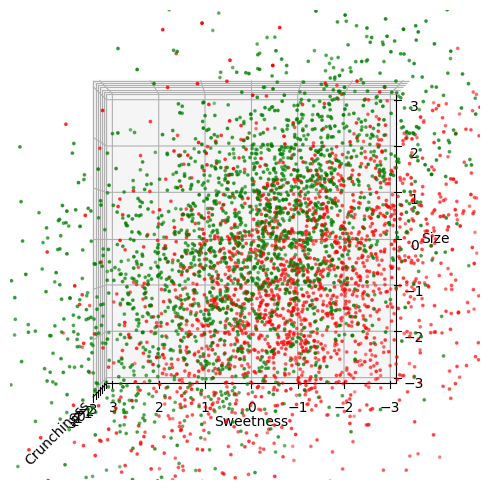

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_size, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.view_init(90, 180)

ax.axes.set_xlim3d(left = -3, right = 3)
ax.axes.set_ylim3d(bottom = -3, top = 3)
ax.axes.set_zlim3d(bottom = -3, top = 3)

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

plt.show()

I was correct: the data could be possibly split by appling a negatively sloped plane from this angle. Here is my initial attempt: \
$crunchiness = size + sweetness + 1$

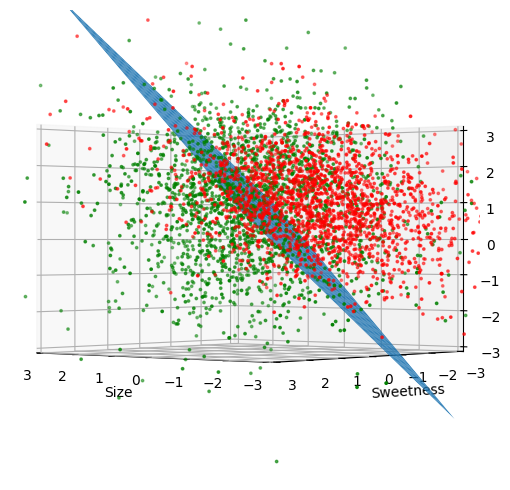

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

#######

xmin, xmax = -3, 3
ymin, ymax = -3, 3
zmin, zmax = -3, 3

X, Y = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
Z = (X + Y + 1)
surf = ax.plot_surface(X, Y, Z)

#######

ax.scatter(good_size, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.view_init(0, 130)

ax.axes.set_xlim3d(left = -3, right = 3)
ax.axes.set_ylim3d(bottom = -3, top = 3)
ax.axes.set_zlim3d(bottom = -3, top = 3)

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


plt.show()

It looks fairly effective for splitting good apples from bad apples, as green dots cluster on one side and red dots cluster on the other side. Just do a few more fine-tuning to maximize the accuracy.

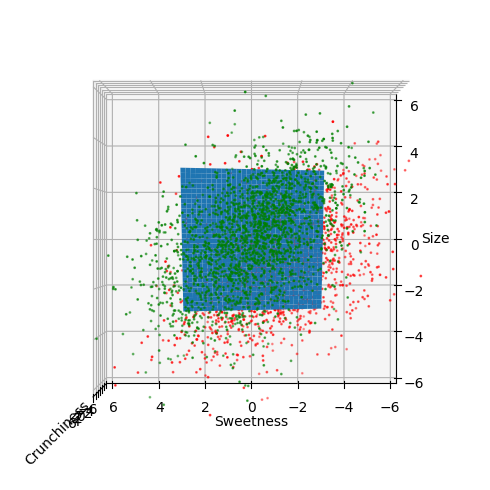

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

#######

xmin, xmax = -3, 3
ymin, ymax = -3, 3
zmin, zmax = -3, 3

X, Y = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
Z = (0.75 + X + Y)
surf = ax.plot_surface(X, Y, Z)

#######

ax.scatter(good_size, good_sweetness, good_crunchiness, s=1, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=1, c='red')

ax.view_init(90, 180)

ax.axes.set_xlim3d(left = -6, right = 6)
ax.axes.set_ylim3d(bottom = -6, top = 6)
ax.axes.set_zlim3d(bottom = -6, top = 6)

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


plt.show()

My new equation is $crunchiness = size + sweetness + 0.75$ \
To my surprise, the relatively effective method was not a vertical plane from this perspective as I initially thought, but a relatively flat plane that "scoops" the good apples out. The following is the overall picture of how the plane applies to the dataset:

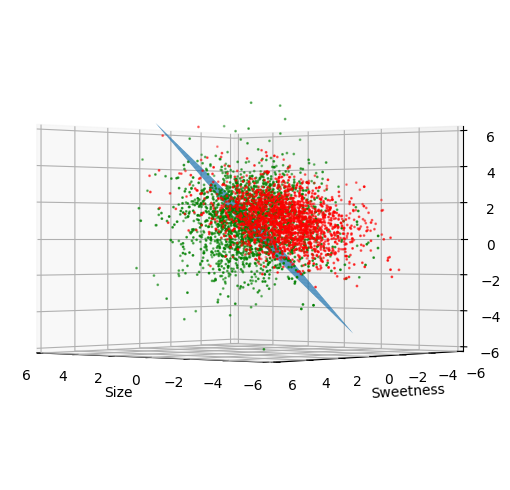

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

#######

xmin, xmax = -3, 3
ymin, ymax = -3, 3
zmin, zmax = -3, 3

X, Y = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
Z = (0.75 + X + Y)
surf = ax.plot_surface(X, Y, Z)

#######

ax.scatter(good_size, good_sweetness, good_crunchiness, s=1, c='green')
ax.scatter(bad_size, bad_sweetness, bad_crunchiness, s=1, c='red')

ax.view_init(0, 130)

ax.axes.set_xlim3d(left = -6, right = 6)
ax.axes.set_ylim3d(bottom = -6, top = 6)
ax.axes.set_zlim3d(bottom = -6, top = 6)

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


plt.show()

The data might still contain flaws, but given three factors it is already effective. The following is a test on how my model would perform. \
Criteria \
For the $i$-th item, compute a special $Z_{temp} = X_i + Y_i + 0.7$, for $X = size$, $Y = sweetness$, and $Z = crunchiness$. If $Z_i < Z_{temp}$ then it is a bad apple, otherwise a good apple. The `evaluate` column shows my prediction compared to real data, with `1` being correctly predicted and `0` otherwise.

In [ ]:
test_df = df[['Size', 'Sweetness', 'Crunchiness', 'Good']].copy()
test_df['z_temp'] = test_df['Size'] + test_df['Sweetness'] + 0.7
test_df['predict_good'] = test_df['Crunchiness'] < test_df['z_temp']
test_df['evaluate'] = (test_df['Good'] == test_df['predict_good']).astype(int)
test_df.head()

,Size,Sweetness,Crunchiness,Good,z_temp,predict_good,evaluate
0,-3.970049,5.346330,-1.012009,True,2.076281,True,1
1,-1.195217,3.664059,1.588232,True,3.168842,True,1
2,-0.292024,-1.738429,-0.342616,False,-1.330453,False,1
3,-0.657196,1.324874,-0.097875,True,1.367678,True,1
4,1.364217,-0.384658,-0.553006,True,1.679559,True,1


And here is the accuracy rate of my model: $66.9\%$. Not bad.

In [ ]:
sum(test_df['evaluate']) / len(test_df['evaluate'])

0.669

I plan to make the best use of these three categoties by changing my formula more. To do this I need to check whether there is a cluster of data I have missed. (orange for hit, purple for miss)

In [ ]:
hit_size = test_df[test_df['evaluate'] == 1]['Size']
miss_size = test_df[test_df['evaluate'] == 0]['Size']
hit_sweetness = test_df[test_df['evaluate'] == 1]['Sweetness']
miss_sweetness = test_df[test_df['evaluate'] == 0]['Sweetness']
hit_crunchiness = test_df[test_df['evaluate'] == 1]['Crunchiness']
miss_crunchiness = test_df[test_df['evaluate'] == 0]['Crunchiness']

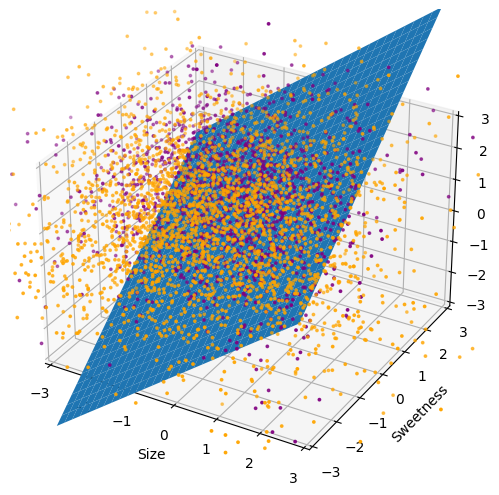

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xmin, xmax = -3, 3
ymin, ymax = -3, 3
zmin, zmax = -3, 3

X, Y = np.meshgrid(np.arange(xmin, xmax, 0.2), np.arange(ymin, ymax, 0.2))
Z = (0.75 + X + Y)
surf = ax.plot_surface(X, Y, Z)

ax.scatter(hit_size, hit_sweetness, hit_crunchiness, s=3, c='orange')
ax.scatter(miss_size, miss_sweetness, miss_crunchiness, s=3, c='purple')

ax.set_xlabel('Size')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

ax.axes.set_xlim3d(left = -3, right = 3)
ax.axes.set_ylim3d(bottom = -3, top = 3)
ax.axes.set_zlim3d(bottom = -3, top = 3)

plt.show()

Unfortunately, for every angle I have rotated, it keeps presenting me this mixbag result with very scattered failed predictions, showing no clue about how I could transform my plane a little to fit better. For the current style of approach it is already close to its maximum accuracy. \
\
On the other hand, I found including size without including weight would not be very logical. $\frac{weight}{size}$ would represent the density of the apple, which might be a better representation. Here is what the scatter plot looks like after replacing size with $density = \frac{weight}{size}$:

In [ ]:
good_density = df[df['Good']]['Weight'] / df[df['Good']]['Size']
bad_density = df[df['Good'] == False]['Weight'] / df[df['Good'] == False]['Size']

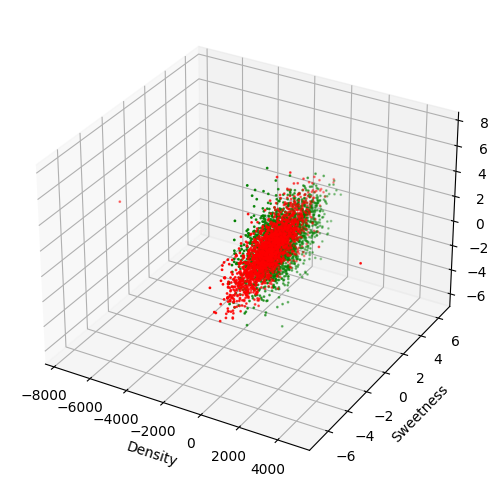

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_density, good_sweetness, good_crunchiness, s=1, c='green')
ax.scatter(bad_density, bad_sweetness, bad_crunchiness, s=1, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

plt.show()

The density range is wider than I expected. One problem I also made was that in the original data, weight and size can be negative, so it's a better approach to make them all positive first.

In [ ]:
df['Weight_new'] = df['Weight'] + min(df['Weight'])
df['Size_new'] = df['Size'] + min(df['Size']) + 0.0001 # avoid divide by 0
df['Density'] = df['Weight_new'] / df['Size_new']
good_density = df[df['Good']]['Density']
bad_density = df[df['Good'] == False]['Density']

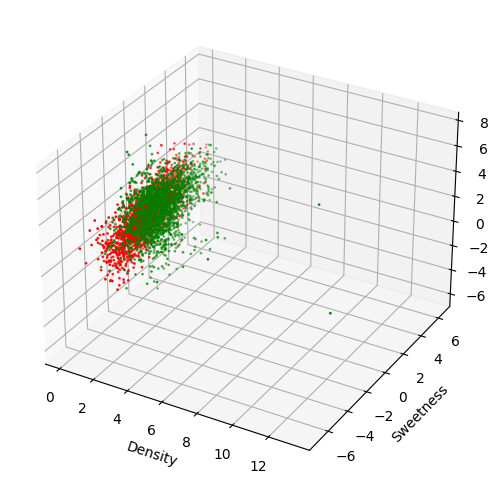

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_density, good_sweetness, good_crunchiness, s=1, c='green')
ax.scatter(bad_density, bad_sweetness, bad_crunchiness, s=1, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

plt.show()

The data looks a lot better, and there is no unexceptionally wide range of density. According to the graph I would just drop all data with $density>2.5$ as outliers.

In [ ]:
df_new = df[df['Density'] <= 2.5][['Density', 'Sweetness', 'Crunchiness', 'Good']]
df_new.head()

,Density,Sweetness,Crunchiness,Good
0,0.868772,5.346330,-1.012009,True
1,1.196756,3.664059,1.588232,True
2,1.142068,-1.738429,-0.342616,False
3,1.206520,1.324874,-0.097875,True
4,1.459460,-0.384658,-0.553006,True


In [ ]:
good_density = df_new[df_new['Good']]['Density']
good_sweetness = df_new[df_new['Good']]['Sweetness']
good_crunchiness = df_new[df_new['Good']]['Crunchiness']
bad_density = df_new[df_new['Good'] == False]['Density']
bad_sweetness = df_new[df_new['Good'] == False]['Sweetness']
bad_crunchiness = df_new[df_new['Good'] == False]['Crunchiness']

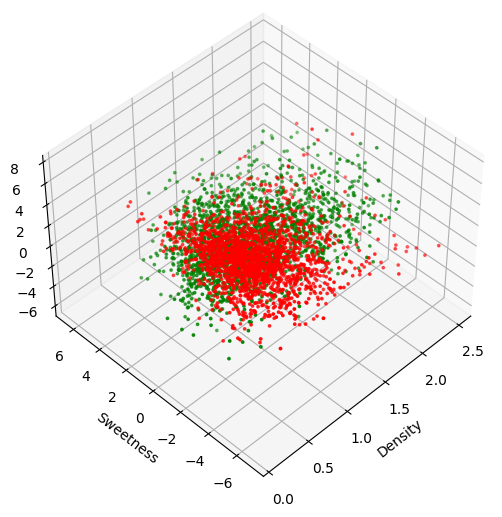

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(good_density, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_density, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


ax.view_init(45, 225)

plt.show()

The data pattern seems to be less obvious, but I could make an attempt by creating a cube at the middle, dots inside the cube are bad, and outside the cube are good. While it cannot consider the red dots spreaded sparsely outside, most of the dots seems to be clustered. \
(I initially planned to do spheroid but calculation is too hard for me.)

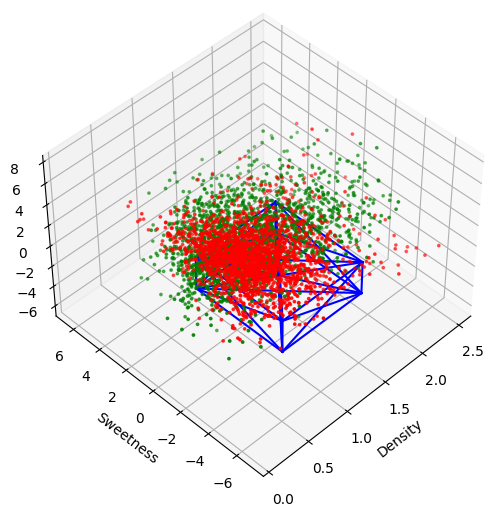

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#####

xr = [0.5, 1.5]
yr = [-6, 0]
zr = [0, 3]
for s, e in combinations(np.array(list(product(xr, yr, zr))), 2):
  ax.plot3D(*zip(s, e), color="b")

#####

ax.scatter(good_density, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_density, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


ax.view_init(45, 225)

plt.show()

Here's a rotated graph to show that most red dots cluster at a small space:

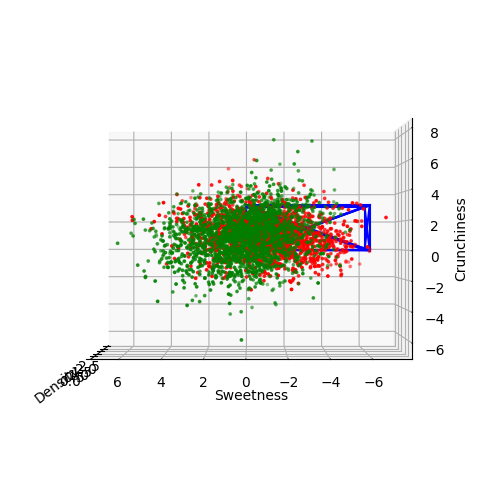

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#####

xr = [0.5, 1.5]
yr = [-6, 0]
zr = [0, 3]
for s, e in combinations(np.array(list(product(xr, yr, zr))), 2):
  ax.plot3D(*zip(s, e), color="b")

#####

ax.scatter(good_density, good_sweetness, good_crunchiness, s=3, c='green')
ax.scatter(bad_density, bad_sweetness, bad_crunchiness, s=3, c='red')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')


ax.view_init(0, 180)

plt.show()

As shown in the graphs, the cube could be a rough estimate of all the red dots being enclosed by the green dots. Here is a test of my model:

In [ ]:
# I need to do this since I dropped some columns
# and pandas had missed column indices
# in this example #37 was missing and need new indices
df_new.index = pd.RangeIndex(len(df_new.index))
df_new.index = range(len(df_new.index))
df_new[35:40]

,Density,Sweetness,Crunchiness,Good
35,1.185511,-4.087156,0.839108,False
36,0.618123,-1.076638,1.524738,True
37,1.186711,3.685437,-0.164141,True
38,1.633349,0.956133,1.477542,True
39,1.443807,-0.921517,2.005491,False


In [ ]:
def prediction(x, y, z):
    if (x > 0.5) and (x < 1.5):
        if (y > -6) and (y < 0):
            if (z > 0) and (z < 3):
                return False
    return True

df_new['predict_good'] = False
for i in range(len(df_new)):
    df_new.loc[i, 'predict_good'] = prediction(df_new.loc[i, 'Density'], df_new.loc[i, 'Sweetness'], df_new.loc[i, 'Crunchiness'])

df_new['evaluate'] = (df_new['Good'] == df_new['predict_good']).astype(int)
df_new.head()

,Density,Sweetness,Crunchiness,Good,predict_good,evaluate
0,0.868772,5.346330,-1.012009,True,True,1
1,1.196756,3.664059,1.588232,True,True,1
2,1.142068,-1.738429,-0.342616,False,True,0
3,1.206520,1.324874,-0.097875,True,True,1
4,1.459460,-0.384658,-0.553006,True,True,1


Turns out that the accuracy is still around $65\%$ ($63.1\%$ to be exact). $60\%-70\%$ would be the expected accuracy for using 3-4 categories, which is already efficient compared to computations involving all 7 categories trying to get a better result.

In [ ]:
sum(df_new['evaluate']) / len(df_new['evaluate'])

0.6310283235519265

In [ ]:
hit_density = df_new[df_new['evaluate'] == 1]['Density']
miss_density = df_new[df_new['evaluate'] == 0]['Density']
hit_sweetness = df_new[df_new['evaluate'] == 1]['Sweetness']
miss_sweetness = df_new[df_new['evaluate'] == 0]['Sweetness']
hit_crunchiness = df_new[df_new['evaluate'] == 1]['Crunchiness']
miss_crunchiness = df_new[df_new['evaluate'] == 0]['Crunchiness']

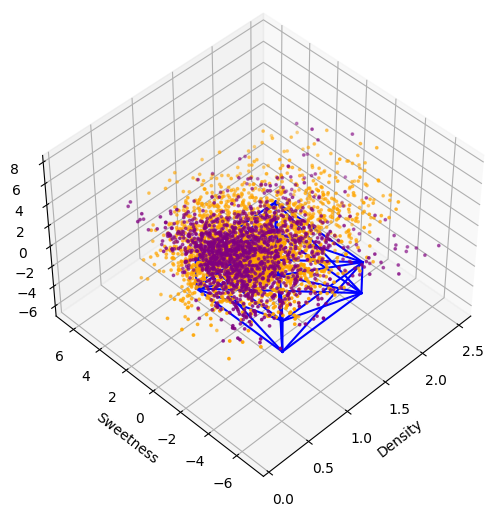

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plt.rcParams["figure.figsize"] = [5,5]
plt.rcParams["figure.autolayout"] = True

xr = [0.5, 1.5]
yr = [-6, 0]
zr = [0, 3]
for s, e in combinations(np.array(list(product(xr, yr, zr))), 2):
  ax.plot3D(*zip(s, e), color="b")

ax.scatter(hit_density, hit_sweetness, hit_crunchiness, s=3, c='orange')
ax.scatter(miss_density, miss_sweetness, miss_crunchiness, s=3, c='purple')

ax.set_xlabel('Density')
ax.set_ylabel('Sweetness')
ax.set_zlabel('Crunchiness')

ax.view_init(45, 225)

plt.show()

The visualization for the missed dots (purple) tells me that dots inside the cube are more complex than I expected, especially for the "curved edges" around the cube. Optimically speaking, using a spheroid would improve the performance; pessimistically speaking, it still has little chance exceeding 70%.

Reflection \
\
This project was aimed to use at most three categorical data to achieve a decent accuracy rate of identifying apple qualities. Technically I ended up using four, but the process of calculating density over original data was essential to me, so still three distinct categories, and with a reduced amount of computations compared to bringing all data into consideration, it is already a decent result. The reason I choose reduced amount of data is because sometimes measuring can be expensive, while apple farmers want to ensure their products are high quality. If a few categories is sufficient to make an accurate prediction, it would benefit a lot of apple farmers. In fact, this minimalization principle does not apply to apples only. It could apply to the broad data analytics industry.